# Breast Cancer - Notebook

## Goal setting and workflow plan
- Dataset: Breast Cancer


**Plan:** 
- Preprocess (Imbalance, NA, Outlier, Endocings)
- EDA
- Training
- Optimization (Grid Search, Baysen Optimization)
- Evaluate
- Feature Importance


## Import Packages and Dataset

In [322]:
# Imports
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

# print working directory
print(os.getcwd())


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1


In [323]:
# load csv

df = pd.read_csv('data/breast-cancer-diagnostic.shuf.lrn.csv')
print(df.head())
print(df.shape)


print(df.columns)

# drop id
df = df.drop(columns=['ID'])

         ID  class  radiusMean   textureMean   perimeterMean   areaMean  \
0    886452   True       13.96         17.05           91.43      602.4   
1  84348301   True       11.42         20.38           77.58      386.1   
2   9012795   True       21.37         15.10          141.30     1386.0   
3    894326   True       18.22         18.87          118.70     1027.0   
4    867387  False       15.71         13.93          102.00      761.7   

    smoothnessMean   compactnessMean   concavityMean   concavePointsMean  ...  \
0          0.10960           0.12790         0.09789             0.05246  ...   
1          0.14250           0.28390         0.24140             0.10520  ...   
2          0.10010           0.15150         0.19320             0.12550  ...   
3          0.09746           0.11170         0.11300             0.07950  ...   
4          0.09462           0.09462         0.07135             0.05933  ...   

    radiusWorst   textureWorst   perimeterWorst   areaWorst   

**Columns**

- ID: Enthält die eindeutige Identifikationsnummer für jeden einzelnen Datensatz
- class: Gibt das diagnostische Ergebnis an – typischerweise, ob der Befund als positiv (z. B. bösartig) oder negativ (z. B. gutartig) eingestuft wird.
- radiusMean: Stellt den durchschnittlichen Radius der Tumorgegend dar, gemessen über mehrere Punkte.
- textureMean: Misst den durchschnittlichen Texturwert der Tumorzellen, also wie „rau“ oder „fein“ die Gewebestruktur erscheint.
- perimeterMean: Enthält die durchschnittliche Länge der Umrandung (Perimeter) des Tumors.
- areaMean: Zeigt die durchschnittliche Fläche der Tumorgegend, die den Tumor umgibt.
- smoothnessMean: Gibt den durchschnittlichen Glattheitsgrad der Tumorstruktur an, also wie gleichmäßig die Grenze verläuft.
- compactnessMean: Misst die durchschnittliche Kompaktheit des Tumors, ein Verhältnis, das die Formregulärität widerspiegelt.
- concavityMean: Beschreibt den durchschnittlichen Einbuchtungseffekt der Tumorgrenze, also inwieweit die Form Einschnitte aufweist.
- concavePointsMean: Erfasst den durchschnittlichen Anteil der Einschnitte (concave points) in der Tumorbegrenzung.
- symmetryMean: Zeigt, wie symmetrisch der Tumor im Durchschnitt aufgebaut ist.
- fractalDimensionMean: Misst die durchschnittliche fraktale Dimension der Tumorgrenzen – ein Maß für die Komplexität der Form.



Die nächsten Spalten geben den Standardfehler (StdErr) der jeweiligen Mittelwerte an, also einen Hinweis auf die Messunsicherheit:

- radiusStdErr: Der Standardfehler des gemessenen Tumorradius.
- textureStdErr: Der Standardfehler der Texturmessung der Tumorzellen.
- perimeterStdErr: Der Standardfehler der Perimeter-Messung des Tumors.
- areaStdErr: Der Standardfehler der Flächenmessung im Tumorbereich.
- smoothnessStdErr: Der Standardfehler bei der Erfassung des Glattheitsgrades.
- compactnessStdErr: Der Standardfehler der Kompaktheitsmessung.
- concavityStdErr: Der Standardfehler der Einbuchtungsmessung.
- concavePointsStdErr: Der Standardfehler der Messung der Einschnitte im Tumorrand.
- symmetryStdErr: Der Standardfehler der Symmetriemessung.
- fractalDimensionStdErr: Der Standardfehler bei der Bestimmung der fraktalen Dimension.


Die letzten Spalten mit dem Suffix „Worst“ fassen jeweils den extremeren (schlechteren) Wert der Messungen zusammen, der auf besonders auffällige Befunde hinweisen kann:

- radiusWorst: Der höchste (auffälligste) gemessene Tumorradius.
- textureWorst: Der höchste Texturwert, der auf abnorme Gewebestrukturen hinweisen könnte.
- perimeterWorst: Der größte gemessene Umfang des Tumors.
- areaWorst: Die größte gemessene Fläche des Tumors.
- smoothnessWorst: Der extremste Glattheitswert, der auf unregelmäßige Randverläufe hindeutet.
- compactnessWorst: Der höchste Wert der Kompaktheit, was auf eine unregelmäßige Tumorform schließen lässt.
- concavityWorst: Der ausgeprägteste Einbuchtungsgrad der Tumorbegrenzung.
- concavePointsWorst: Die höchste Anzahl bzw. der stärkste Ausdruck von Einschnitten im Tumorperimeter.
- symmetryWorst: Der ausgeprägteste (abnormale) Symmetriemesswert im Tumor, der auf eine starke Abweichung von idealer Symmetrie hinweist.
- fractalDimensionWorst: Die höchste gemessene fraktale Dimension, die auf eine erhöhte Komplexität der Tumorstruktur schließen lässt.


## Preprocessing

### Missing Values
There are fortunately no explicit missing values. 


In [324]:
# na values
print(df.isnull().sum().sum())

0


### Types

In [325]:
# Print types of each column
print(df.dtypes)

class                         bool
radiusMean                 float64
 textureMean               float64
 perimeterMean             float64
 areaMean                  float64
 smoothnessMean            float64
 compactnessMean           float64
 concavityMean             float64
 concavePointsMean         float64
 symmetryMean              float64
 fractalDimensionMean      float64
 radiusStdErr              float64
 textureStdErr             float64
 perimeterStdErr           float64
 areaStdErr                float64
 smoothnessStdErr          float64
 compactnessStdErr         float64
 concavityStdErr           float64
 concavePointsStdErr       float64
 symmetryStdErr            float64
 fractalDimensionStdErr    float64
 radiusWorst               float64
 textureWorst              float64
 perimeterWorst            float64
 areaWorst                 float64
 smoothnessWorst           float64
 compactnessWorst          float64
 concavityWorst            float64
 concavePointsWorst 

### Split

In [326]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123) # we used 0.3 before



### Outlier Handling
It is important to deal with outliers because they can lead to an unstable model. First we identify the outliers by plots to get an impression. After that we will calculate the Z-scores to identify them and handle them. 


$$
z = \frac{x - \mu}{\sigma}
$$


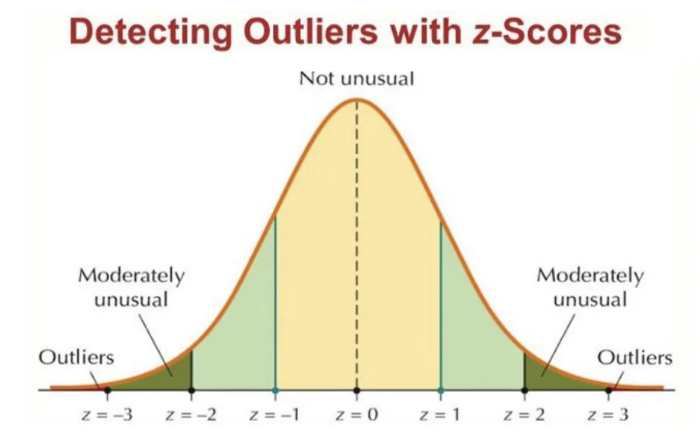

Since we have an high dimensional data set and limited records we will impute the outliers instead of dropping them out. We use the Median as imputation.  


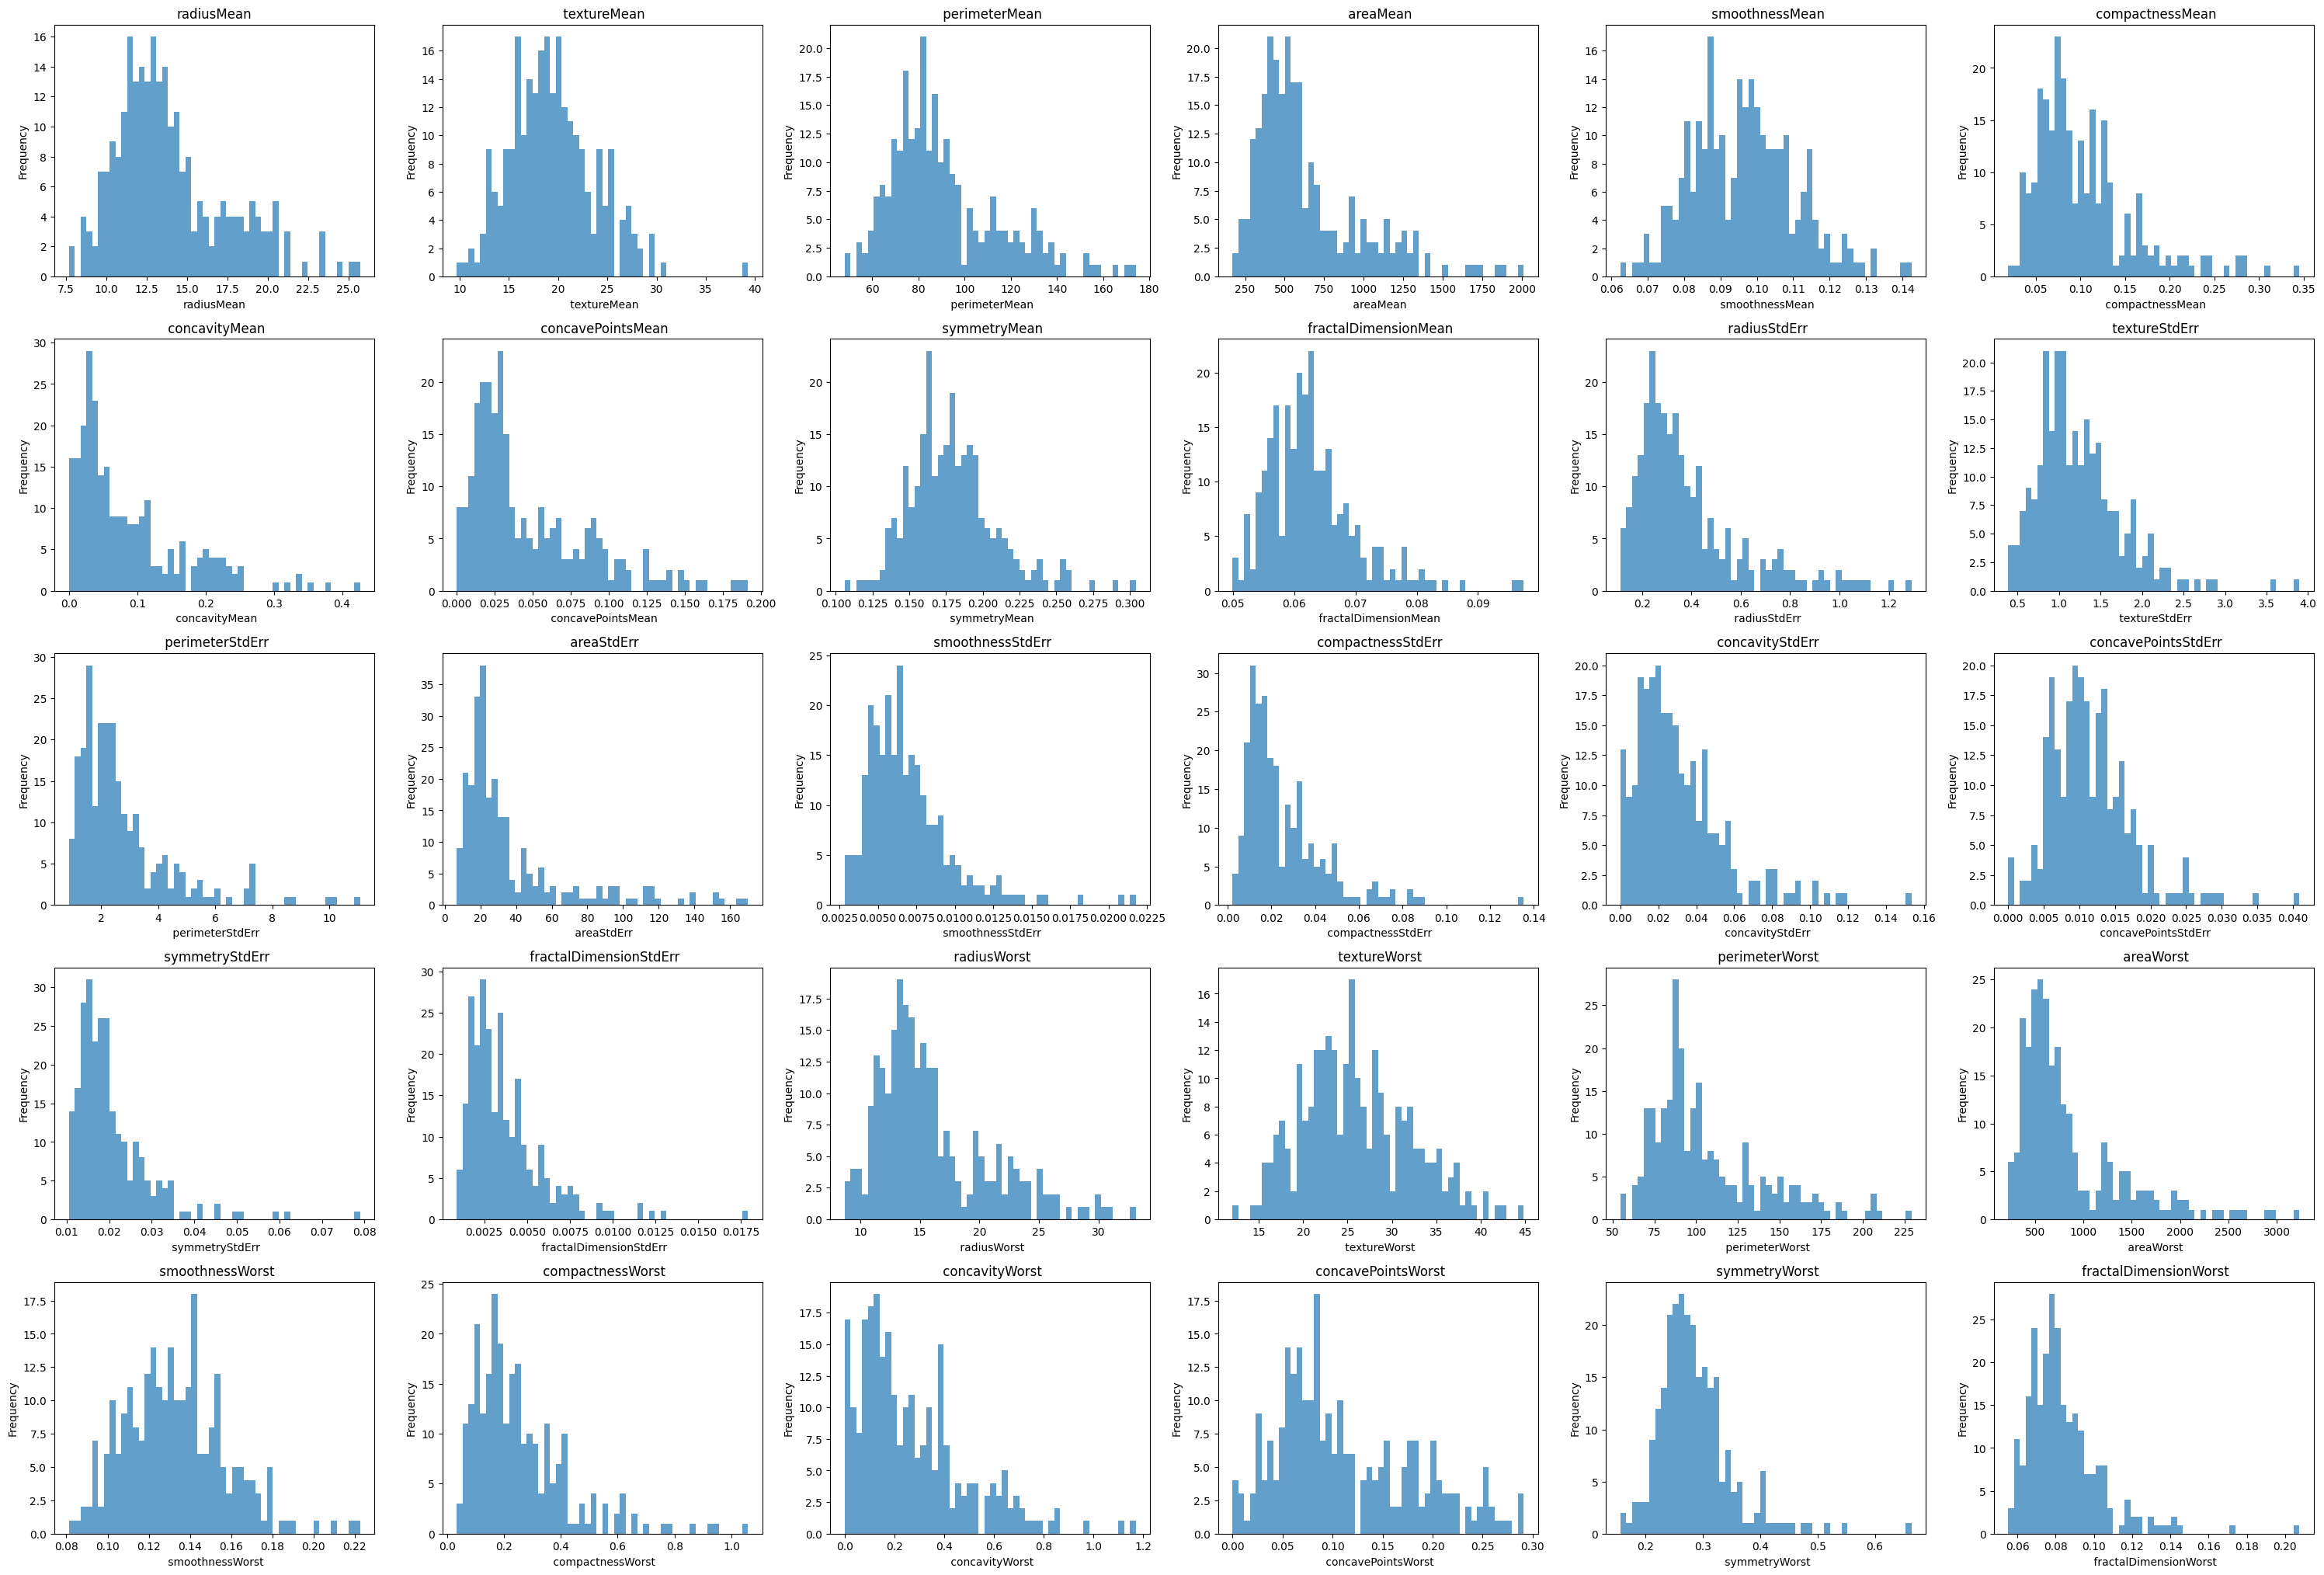

In [327]:
# 32 columns 

def plot_features(df):
    numeric_cols = df.select_dtypes(include='number').columns

    # grid size
    rows = 6
    cols = 6

    plt.figure(figsize=(cols * 5, rows * 4))

    for i, column in enumerate(numeric_cols):
        if i >= rows * cols:
            break # max number of plots 

        plt.subplot(rows, cols, i + 1)
        plt.hist(df[column], bins=50, alpha=0.7)
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot features
plot_features(X_train)

In [328]:
# Calculate outliers with z score
def calculate_outliers_z_score(df, threshold=3):
    outliers = {}
    numeric_cols = df.select_dtypes(include='number').columns

    for column in numeric_cols:
        mean = df[column].mean()
        std = df[column].std()
        z_scores = (df[column] - mean) / std
        outliers[column] = np.where(np.abs(z_scores) > threshold)[0]

    return outliers

### OPTION: adjust threshold 
# calc outliers
outliers = calculate_outliers_z_score(X_train, threshold=3) # Only on X_train

print(outliers)

{'radiusMean': array([ 30, 116, 172]), ' textureMean': array([122]), ' perimeterMean': array([ 30, 116, 172]), ' areaMean': array([ 30, 116, 131, 172, 199, 247]), ' smoothnessMean': array([ 24, 178]), ' compactnessMean': array([  1,  21, 139, 178, 192, 252]), ' concavityMean': array([116, 139, 172, 192, 199]), ' concavePointsMean': array([116, 139, 172]), ' symmetryMean': array([ 60, 192, 198]), ' fractalDimensionMean': array([ 53, 144, 178]), ' radiusStdErr': array([  1,  79, 139, 247, 252]), ' textureStdErr': array([ 68,  91, 226]), ' perimeterStdErr': array([  1,  91, 139, 192, 252]), ' areaStdErr': array([  1,  30, 116, 131, 139, 247, 252]), ' smoothnessStdErr': array([ 53, 101, 108, 168, 238]), ' compactnessStdErr': array([ 36,  91, 108, 139, 222]), ' concavityStdErr': array([ 36, 139, 144, 192, 209, 222]), ' concavePointsStdErr': array([ 91, 108, 209, 252]), ' symmetryStdErr': array([169, 178, 192, 222, 238]), ' fractalDimensionStdErr': array([ 36,  53,  91, 209, 222]), ' radiusW

In [329]:
def impute_outliers(df, outliers, reference_df=None):
   
    # median of reference_df 
    
    for column, indices in outliers.items():
        if reference_df is not None:
            median = reference_df[column].median()
        else:
            median = df[column].median()
        df.iloc[indices, df.columns.get_loc(column)] = median

    return df

# impute outliers
X_train_imputed = impute_outliers(X_train.copy(), outliers)
# X_test_imputed = impute_outliers(X_test.copy(), outliers, reference_df=X_train) # Data Leakage!!

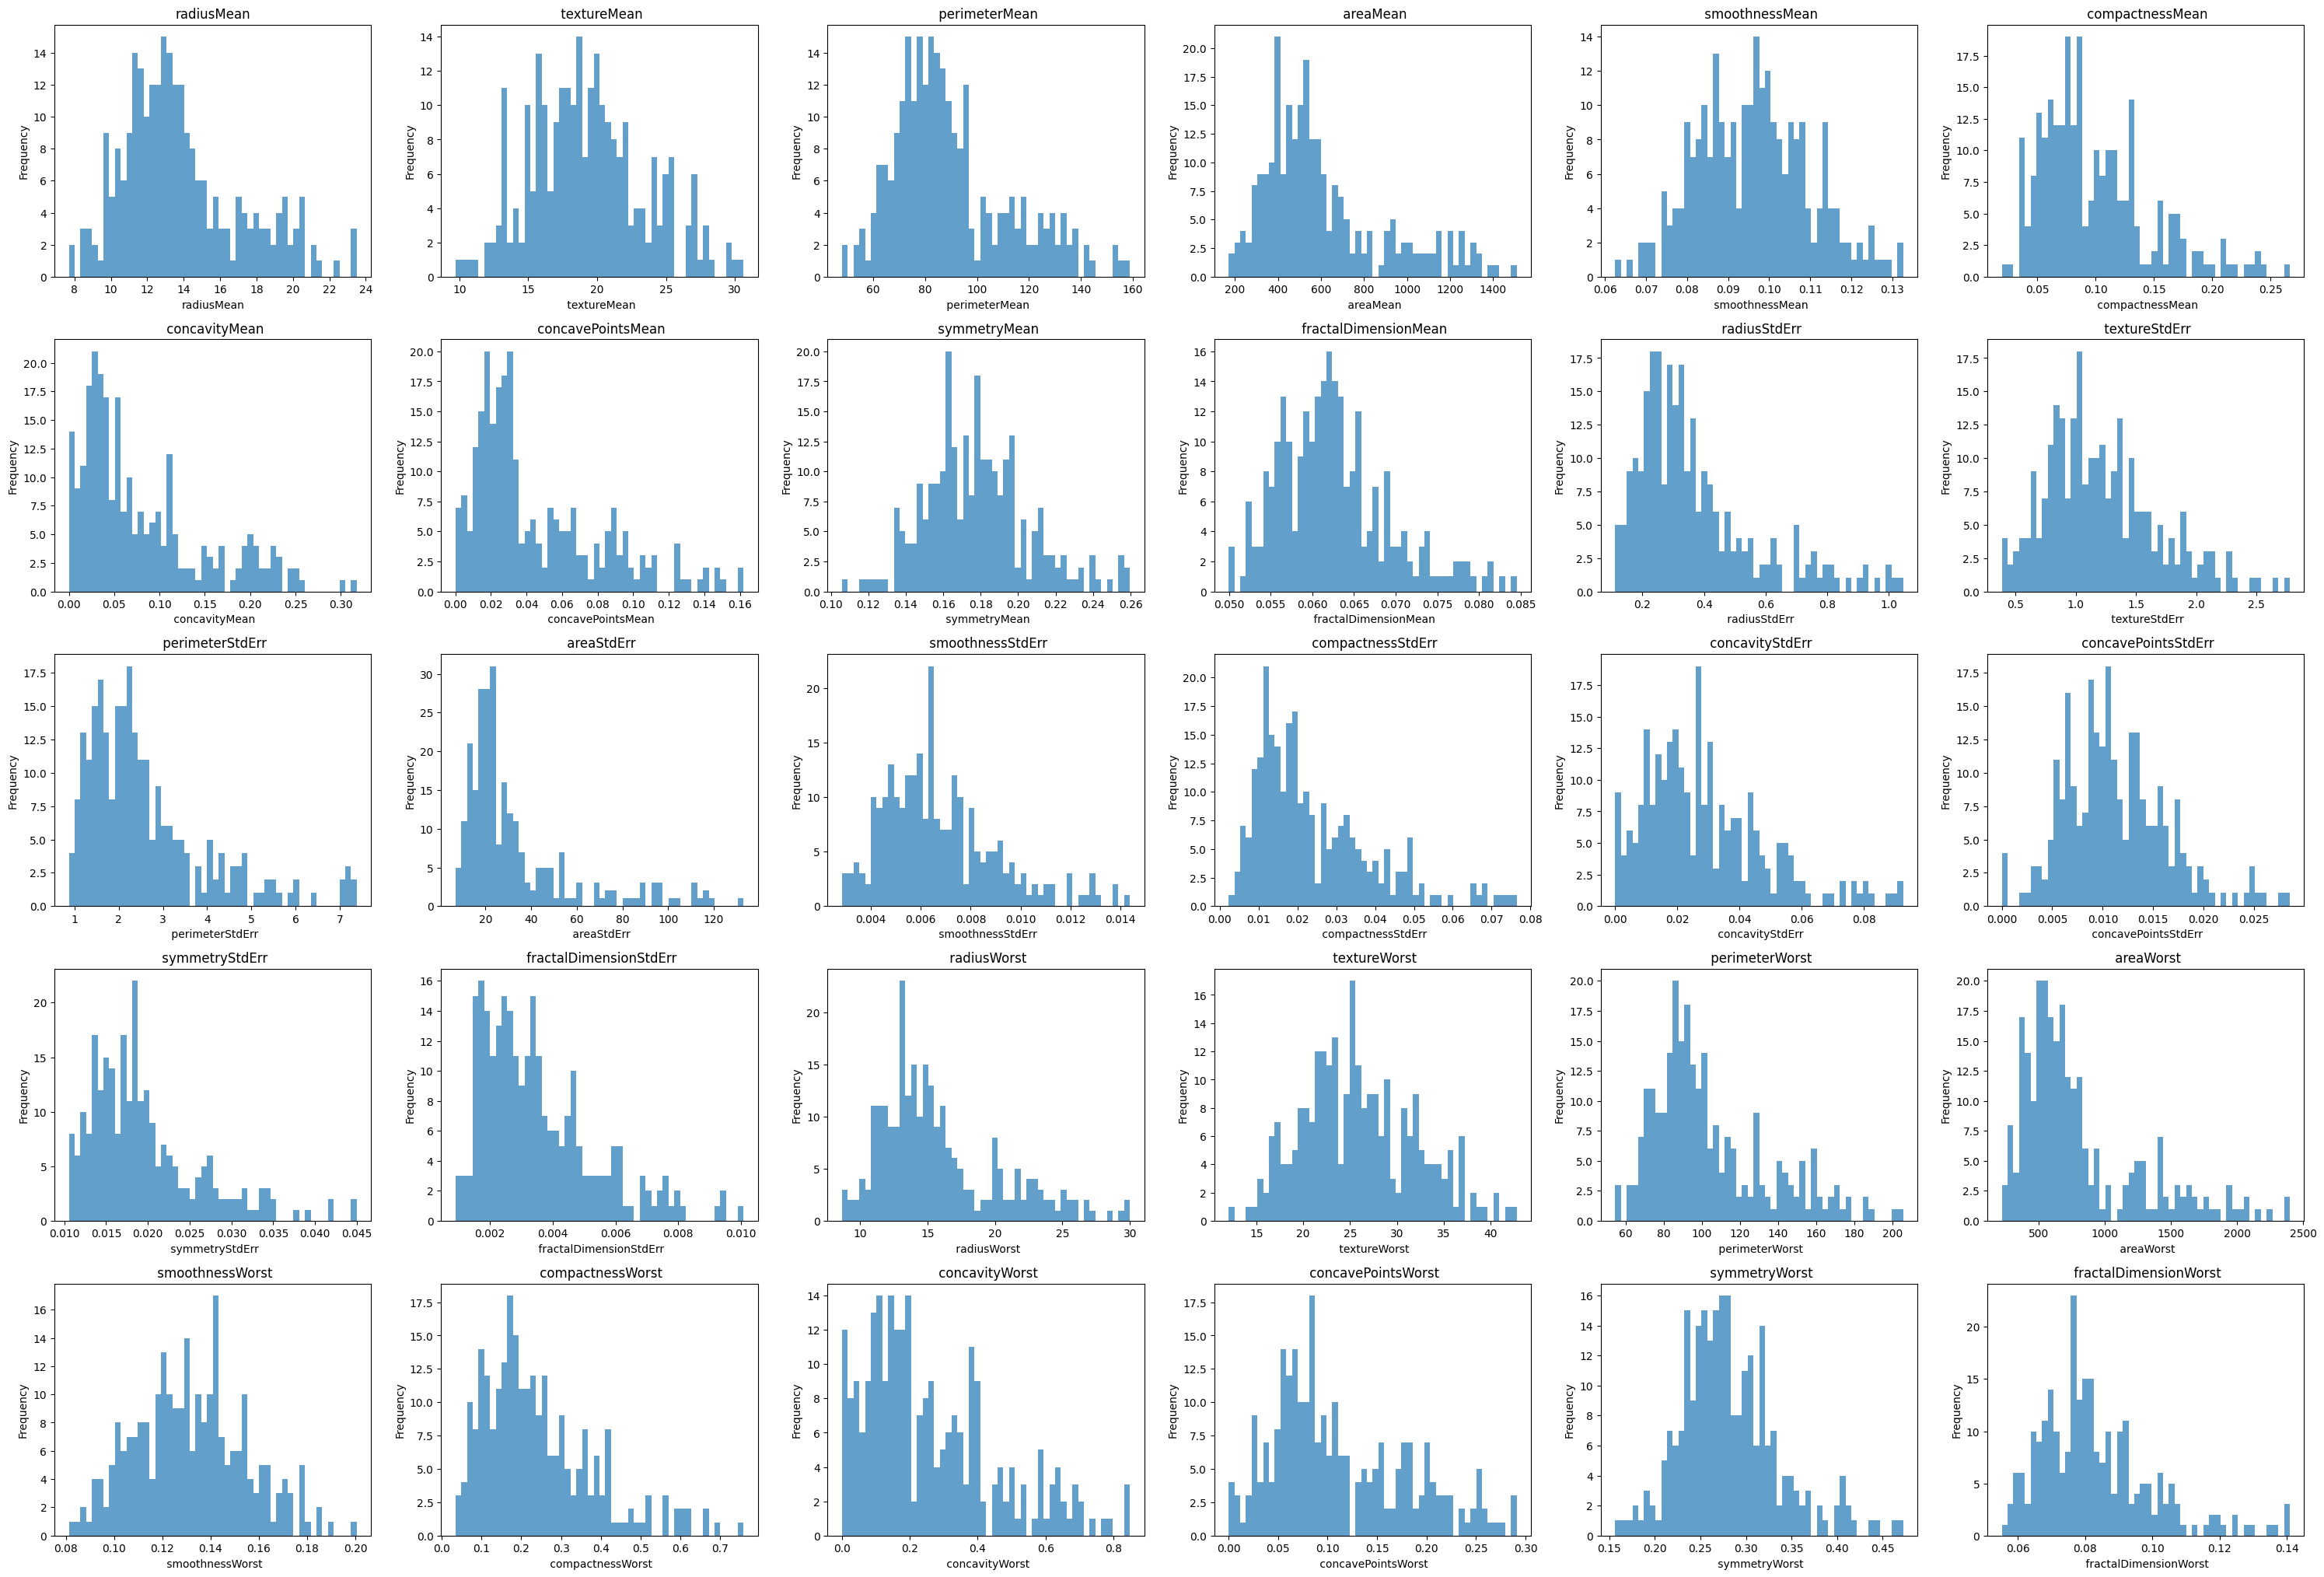

In [330]:
plot_features(X_train_imputed)

### Class Imbalance
Its very important to deal with that because with in high imbalances class the classifier cold tend to just predict the majority class. 

In our medical context it might be way mor important to predict if there is an diagnose! 

For the kaggle competition: **F1-Score**!!  Precision and Recall are important
 

**SMOTE:**
- Creates synthetic examples by combining nearby points of the minority class.

**Random Oversampling:**
- duplication of existing positive 

Text(0, 0.5, 'Count')

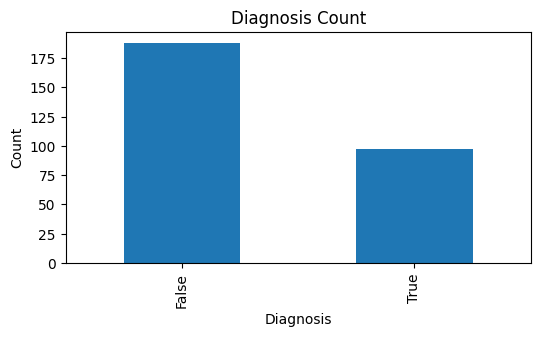

In [331]:
#distribution of the target variable
plt.figure(figsize=(6, 3))
y.value_counts().plot(kind='bar')
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')


Text(0.5, 0, 'Diagnosis')

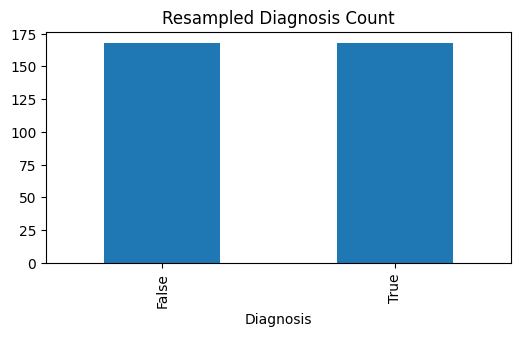

In [332]:
# SMOTE oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)

# Fit to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Plot the resampled data
plt.figure(figsize=(6, 3))
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Resampled Diagnosis Count')
plt.xlabel('Diagnosis')



### Correlation matrix
We can see that there are highly correlated variabes in the data set. Obviosly radius_mean and radius_worst or texture_mean and texture_worst are very highly correlated. 

But also other aspects of the tumor are actualy describing something similar. (radius ~ circumference ~ surface area)






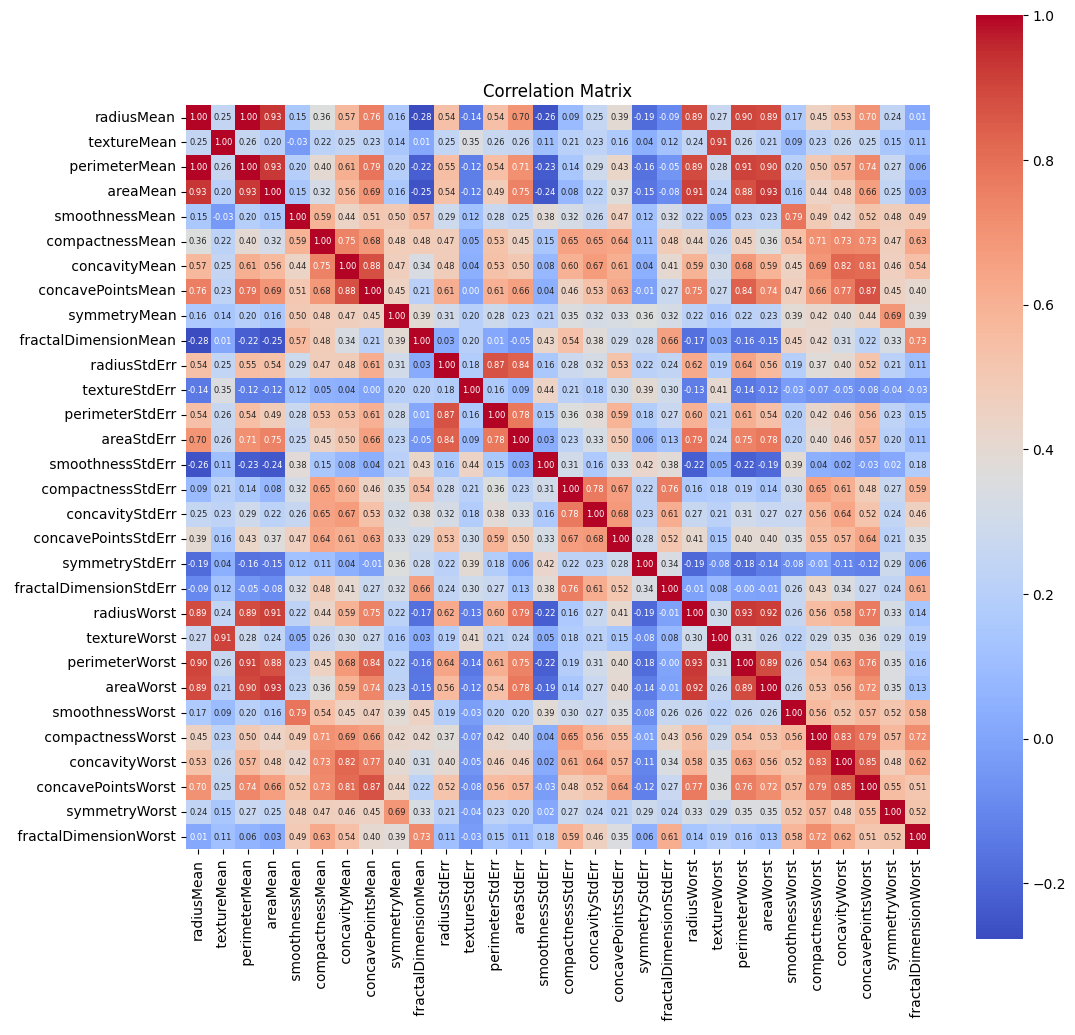

In [333]:
# EDA 
# Correlation matrix
import seaborn as sns
def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 12))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, annot_kws={"size": 6})
    plt.title('Correlation Matrix')
    plt.show()

# Plot correlation matrix
plot_correlation_matrix(X_train_imputed)



### Dimension reduction 
to cope with the multicolinarity 

#### Scaling

In [334]:
from sklearn.preprocessing import StandardScaler

# Fit  scaler training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled) 

# Scaling of the test data set BASED on the training data
X_test_scaled = scaler.transform(X_test)



#### PCA

In [335]:
from sklearn.decomposition import PCA

def apply_pca(X_train_scaled, X_test_scaled, activate_pca=True, n_components=0.95):
    if activate_pca:
        pca = PCA(n_components=n_components)
        X_train_final = pca.fit_transform(X_train_scaled)
        X_test_final = pca.transform(X_test_scaled)
    else:
        X_train_final = X_train_scaled
        X_test_final = X_test_scaled

    return X_train_final, X_test_final


X_train_final, X_test_final = apply_pca(X_train_scaled, X_test_scaled, activate_pca=True)


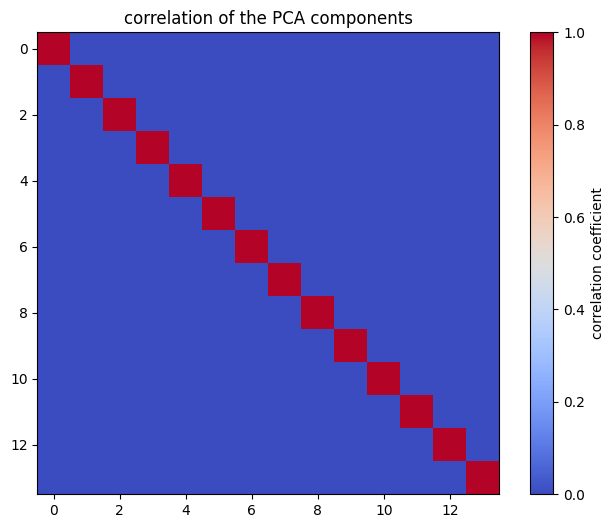

In [336]:
import numpy as np
import matplotlib.pyplot as plt

corr_matrix_pca = np.corrcoef(X_train_final, rowvar=False)
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix_pca, cmap='coolwarm', interpolation='none')
plt.colorbar(label='correlation coefficient')
plt.title('correlation of the PCA components')
plt.show()

## Modeling


cross-validation is preformed on data that has already been preprocessed - Potential Data Leakage!
- With a Pipeline the preprocessing is performed only within a fold 
- But the preprocessing has to be performed for every fold

pipline: https://medium.com/@sahin.samia/scikit-learn-pipelines-explained-streamline-and-optimize-your-machine-learning-processes-f17b1beb86a4





In [337]:
# Import pipline
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  #
from imblearn.over_sampling import SMOTE

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [338]:
### Preprocessing pipline - Outlier-Imputer
from imblearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class ZScoreOutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold_z_score=3):
        self.threshold_z_score = threshold_z_score
        
    def fit(self, X, y=None):
        Xn = X.select_dtypes(include='number')
        self.cols_   = Xn.columns
        self.mean_   = Xn.mean()
        self.std_    = Xn.std()
        self.median_ = Xn.median()
        return self
    
    def transform(self, X):
        X = X.copy()
        z = (X[self.cols_] - self.mean_) / self.std_
        mask = z.abs() > self.threshold_z_score
        for col in self.cols_:
            X.loc[mask[col], col] = self.median_[col]
        return X
    


## Models in the pipline

In [339]:
# imports 
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Import evaluation metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


In [340]:
models = {
    'logreg': LogisticRegression(max_iter=1000, random_state=42),
    'svm':    SVC(probability=True, random_state=42),
    'rf':     RandomForestClassifier(n_estimators=200, random_state=42),
    'ada':    AdaBoostClassifier(random_state=42),
    'gb':     GradientBoostingClassifier(random_state=42)
}


In [341]:
# Fit models in the pipeline
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, clf in models.items():
    pipe = Pipeline([
        ('outlier', ZScoreOutlierImputer(threshold_z_score=3)),
        ('smote',   SMOTE(random_state=123)),
        ('scale',   StandardScaler()),
        ('pca',     PCA(n_components=0.95)),
        ('clf',     clf)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    
    print(f"{name:6s} → mean acc: {scores.mean():.3f} ± {scores.std():.3f} | var: {np.var(scores):.5f}")



logreg → mean acc: 0.976 ± 0.032 | var: 0.00102
svm    → mean acc: 0.965 ± 0.021 | var: 0.00046
rf     → mean acc: 0.937 ± 0.059 | var: 0.00354
ada    → mean acc: 0.957 ± 0.028 | var: 0.00077
gb     → mean acc: 0.933 ± 0.067 | var: 0.00448


### Hold out


logreg Model:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.90      1.00      0.95         9

    accuracy                           0.97        29
   macro avg       0.95      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29




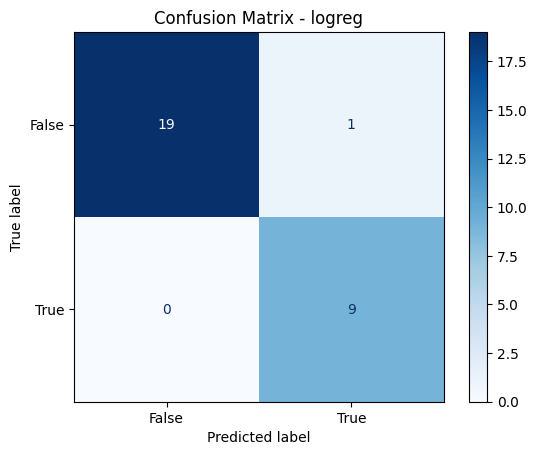

svm Model:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00         9

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29




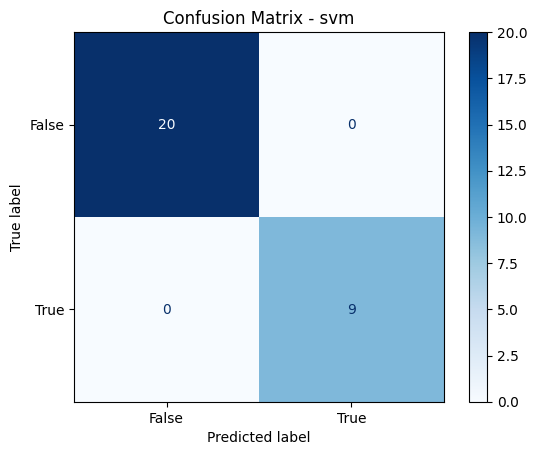

rf Model:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.90      1.00      0.95         9

    accuracy                           0.97        29
   macro avg       0.95      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29




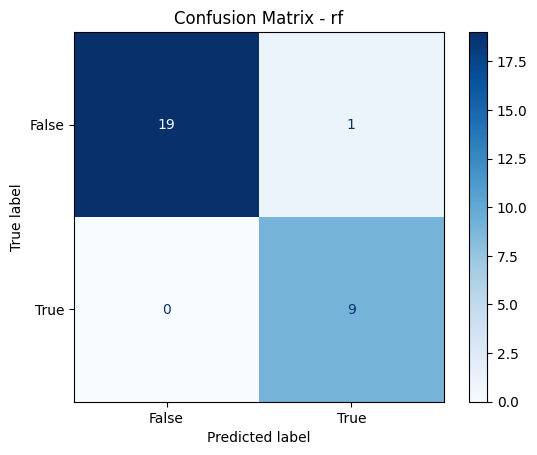

ada Model:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00         9

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29




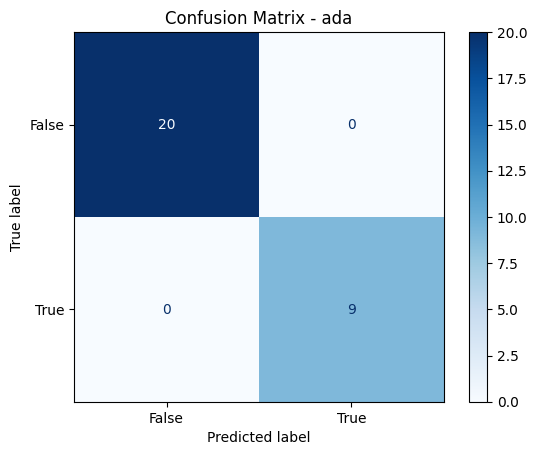

gb Model:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.90      1.00      0.95         9

    accuracy                           0.97        29
   macro avg       0.95      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29




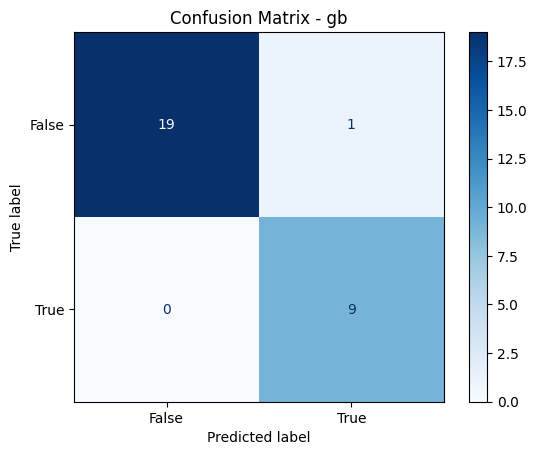

Model Comparison:
logreg: Accuracy = 0.9655
svm: Accuracy = 1.0000
rf: Accuracy = 0.9655
ada: Accuracy = 1.0000
gb: Accuracy = 0.9655


In [342]:
# Train all the models 
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


# Train and evaluate all models on the test set
results = {}

for name, clf in models.items():
    # Create a pipeline for each model
    pipe = Pipeline([
        ('outlier', ZScoreOutlierImputer(threshold_z_score=3)),
        ('smote', SMOTE(random_state=123)),
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', clf)
    ])
    
    # Train the pipeline
    pipe.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipe.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Model:")
    print(classification_report(y_test, y_pred))
    print()

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Compare results
print("Model Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")


## Hyperparameter optimization

- optuna
- Grid search


| Algorithm           | Parameter          | Description                                                                 |
|---------------------|--------------------|-----------------------------------------------------------------------------|
| **LogisticRegression** | `C`                 | Inverse regularization strength (smaller → stronger regularization).        |
|                     | `penalty`           | Type of regularization: `l1` (Lasso), `l2` (Ridge), `elasticnet` (mix).     |
|                     | `solver`            | Optimization algorithm (`liblinear`, `saga` supports `elasticnet`).         |
|                     | `max_iter`          | Maximum number of iterations for convergence.                               |
| **SVC**             | `C`                 | Regularization (trade-off between training error and margin).               |
|                     | `kernel`            | Kernel function: `linear`, `rbf` (Gaussian), `poly` (polynomial).           |
|                     | `degree`            | Degree of the polynomial (only for `kernel='poly'`).                        |
|                     | `gamma`             | Kernel coefficient for `rbf`/`poly` (`scale` vs. `auto`).                   |
| **RandomForest**    | `n_estimators`      | Number of decision trees.                                                   |
|                     | `max_depth`         | Maximum depth of each tree (`None` = unlimited).                            |
|                     | `max_features`      | Number of features to consider for each split.                              |
|                     | `min_samples_split` | Minimum number of samples required to split a node.                         |
| **AdaBoost**        | `n_estimators`      | Number of base classifiers (usually decision stumps).                       |
|                     | `learning_rate`     | Weighting of individual base classifiers.                                   |
|                     | `algorithm`         | Reweighting strategy (`SAMME.R` is faster, with probabilistic predictions). |
| **GradientBoosting**| `n_estimators`      | Number of boosting stages.                                                  |
|                     | `learning_rate`     | Learning rate (smaller → more cautious, slower training).                   |
|                     | `max_depth`         | Maximum depth of individual base trees.                                     |
|                     | `subsample`         | Fraction of the sample used for each tree (sampling reduces variance).      |
|                     | `max_features`      | Number of features to consider at each split.                               |



In [343]:
# Voraussetzung: pip install scikit-optimize

from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

### Gridsearch
# Parametergrid (GridsearchCV)
param_grids = {
    'logreg': {
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'clf__penalty': ['l1', 'l2'],
        'clf__solver': ['liblinear', 'saga'],
        'clf__max_iter': [100, 200, 500]
    },
    'svm': {
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'rbf', 'poly'],
        'clf__degree': [2, 3, 4],
        'clf__gamma': ['scale', 'auto']
    },
    'rf': {
        'clf__n_estimators': [100, 200, 300, 400, 500],
        'clf__max_depth': [None, 10, 20, 30, 40, 50],
        'clf__max_features': ['sqrt', 'log2', None],
        'clf__min_samples_split': [2, 5, 10]
    },
    'ada': {
        'clf__n_estimators': [50, 100, 200, 300],
        'clf__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0],
        #'clf__algorithm': ['SAMME', 'SAMME.R']
    },
    'gb': {
        'clf__n_estimators': [100, 200, 300],
        'clf__learning_rate': [0.001, 0.01, 0.1, 0.2],
        'clf__max_depth': [3, 5, 7, 9],
        'clf__subsample': [0.6, 0.8, 1.0],
        'clf__max_features':['sqrt', 'log2', None]
    }
}


### Bayesian Optimization (BayesSearchCV)
param_spaces = {
    'logreg': {
        'clf__C':        Real(1e-3, 1e2, prior='log-uniform'),
        'clf__penalty':  Categorical(['l1', 'l2']),             
        'clf__solver':   Categorical(['liblinear', 'saga']),
        'clf__max_iter': Integer(100, 500) 
    },
    'svm': {
        'clf__C':      Real(1e-2, 1e2, prior='log-uniform'),
        'clf__kernel': Categorical(['linear', 'rbf', 'poly']),
        'clf__degree': Integer(2, 5),
        'clf__gamma':  Categorical(['scale', 'auto'])
    },
    'rf': {
        'clf__n_estimators':    Integer(100, 500),
        'clf__max_depth':       Integer(5, 60),
        'clf__max_features':    Categorical(['sqrt', 'log2', None]),
        'clf__min_samples_split': Integer(2, 20)
    },
    'ada': {
        'clf__n_estimators':  Integer(50, 300),
        'clf__learning_rate': Real(1e-3, 2.0, prior='log-uniform'),
    },
    'gb': {
        'clf__n_estimators':  Integer(100, 500),
        'clf__learning_rate': Real(1e-3, 0.5, prior='log-uniform'),
        'clf__max_depth':     Integer(2, 12),
        'clf__subsample':     Real(0.5, 1.0),
        'clf__max_features':  Categorical(['sqrt', 'log2', None])
    }
}

# Pipline
def make_pipeline(clf):
    return Pipeline([
        ('outlier', ZScoreOutlierImputer(threshold_z_score=3)),
        ('smote', SMOTE(random_state=123)),
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('clf', clf)
    ])


### Gridsearch

In [344]:
# deativcate warnings

grid_dict = {}  
results = [] 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Grid Search
grid_results = {}
for name, clf in models.items():
    if name not in param_grids:
        continue  # 
    pipe = make_pipeline(clf)
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)

    grid_dict[name] = gs

    best_score = gs.best_score_
    best_params = gs.best_params_
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n=== GridSearch for {name} ===")
    print("Best Score:", best_score)
    print("Best Parameter:", best_params)
    print(f"Accuracy on holdout set: {accuracy:.4f}")

    # safe results
    results.append({
        'Classifier': name,
        'Best Score': round(best_score, 3),
        'Best Parameters': best_params,
        'Accuracy': round(accuracy, 3)
    })

results_grid = pd.DataFrame(results)
results_grid = results_grid.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


print("\n=== RESULTS GRIDSEARCH ===")
print(results_grid.to_string(index=False))



Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_


=== GridSearch for logreg ===
Best Score: 0.9764705882352942
Best Parameter: {'clf__C': 1, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Accuracy on holdout set: 0.9655
Fitting 5 folds for each of 90 candidates, totalling 450 fits

=== GridSearch for svm ===
Best Score: 0.9764705882352942
Best Parameter: {'clf__C': 0.1, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Accuracy on holdout set: 1.0000
Fitting 5 folds for each of 270 candidates, totalling 1350 fits

=== GridSearch for rf ===
Best Score: 0.9414781297134238
Best Parameter: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Accuracy on holdout set: 0.9310
Fitting 5 folds for each of 24 candidates, totalling 120 fits

=== GridSearch for ada ===
Best Score: 0.9568627450980391
Best Parameter: {'clf__learning_rate': 0.5, 'clf__n_estimators': 200}
Accuracy on holdout set: 1.0000
Fitting 5 folds for each of 432 candidates, totalli

| Classifier         | CV Score | Best Parameters                                                                                      | Holdout Accuracy |
|--------------------|----------|------------------------------------------------------------------------------------------------------|------------------|
| AdaBoost           | 0.957    | {'clf__learning_rate': 0.5, 'clf__n_estimators': 200}                                                 | 1.000            |
| Logistic Regression| 0.976    | {'clf__C': 1, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}                | 0.966            |
| Gradient Boosting  | 0.961    | {'clf__learning_rate': 0.2, 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100, 'clf__subsample': 0.8} | 0.966            |
| Random Forest      | 0.941    | {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 5, 'clf__n_estimators': 100} | 0.931            |
| SVM                | 0.976    | {'clf__C': 0.1, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}                    | 1.000            |


### Baysen Optimization

In [345]:
results = []
bayes_dict = {}

for name, clf in models.items():
    if name not in param_spaces:
        continue

    pipe = make_pipeline(clf)
    bs = BayesSearchCV(
        estimator=pipe,
        search_spaces=param_spaces[name],
        n_iter=30,
        cv=5,
        scoring='accuracy', #
        random_state=123,
        n_jobs=-1,
        verbose=1
    )
    bs.fit(X_train, y_train)
    bayes_dict[name] = bs
    y_pred = bs.predict(X_test)

    best_score = bs.best_score_
    best_params = bs.best_params_
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n=== BayesSearch for {name} ===")
    print("Best Score:", best_score)
    print("Best Parameter:", best_params)
    print(f"Accuracy on holdout set: {accuracy:.4f}")

    # save values
    results.append({
        'Classifier': name,
        'Best Score': round(best_score, 3),
        'Best Parameters': best_params,
        'Accuracy': round(accuracy, 3)
    })


results_bayes = pd.DataFrame(results)
results_bayes = results_bayes.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# 
print("\n=== RESULTS BAYSEN ===")
print(results_bayes.to_string(index=False))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/paulbojan/Documents/TU Wien/4.Semester/ML/Ex1/.conda/lib/python3.11/site-packages/sklearn/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits

=== BayesSearch for logreg ===
Best Score: 0.9804675716440423
Best Parameter: OrderedDict([('clf__C', 0.650241359121486), ('clf__max_iter', 242), ('clf__penalty', 'l1'), ('clf__solver', 'saga')])
Accuracy on holdout set: 1.0000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitt

In [346]:
print("RESULTS BAYES")
display(results_bayes)

print("RESULTS GRIDSEARCH")
display(results_grid)

RESULTS BAYES


,Classifier,Best Score,Best Parameters,Accuracy
0,logreg,0.980,"{'clf__C': 0.650241359121486, 'clf__max_iter':...",1.000
1,svm,0.973,"{'clf__C': 0.4459704211079789, 'clf__degree': ...",1.000
2,ada,0.957,"{'clf__learning_rate': 1.8894353818733796, 'cl...",1.000
3,rf,0.937,"{'clf__max_depth': 8, 'clf__max_features': 'lo...",0.931
4,gb,0.957,"{'clf__learning_rate': 0.20777281674740541, 'c...",0.931


RESULTS GRIDSEARCH


,Classifier,Best Score,Best Parameters,Accuracy
0,svm,0.976,"{'clf__C': 0.1, 'clf__degree': 2, 'clf__gamma'...",1.000
1,ada,0.957,"{'clf__learning_rate': 0.5, 'clf__n_estimators...",1.000
2,logreg,0.976,"{'clf__C': 1, 'clf__max_iter': 100, 'clf__pena...",0.966
3,gb,0.961,"{'clf__learning_rate': 0.2, 'clf__max_depth': ...",0.966
4,rf,0.941,"{'clf__max_depth': None, 'clf__max_features': ...",0.931


| Classifier   | CV Score | Best Parameters | Holdout Accuracy |
|--------------|------------|-----------------|----------|
| SVM          | 0.973      | {'clf__C': 0.4459704211079789, 'clf__degree': 4, 'clf__gamma': 'auto', 'clf__kernel': 'linear'} | 1.000    |
| AdaBoost     | 0.957      | {'clf__learning_rate': 1.8894353818733796, 'clf__n_estimators': 241} | 1.000    |
| Random Forest| 0.937      | {'clf__max_depth': 8, 'clf__max_features': 'log2', 'clf__min_samples_split': 6, 'clf__n_estimators': 463} | 0.931    |
| Gradient Boosting | 0.957 | {'clf__learning_rate': 0.20777281674740541, 'clf__max_depth': 6, 'clf__max_features': 'sqrt', 'clf__n_estimators': 285, 'clf__subsample': 0.8129171815496639} | 0.931    |


## Evaluation

Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data. Hold-out, on the other hand, is dependent on just one train-test split. That makes the hold-out method score **dependent on how the data is split** into train and test sets.
(https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f)

We trained the model with another random-state in the train test split. 

Logistic regression seems to be the best model! 
- Best Parameter: OrderedDict([('clf__C', 0.650241359121486), ('clf__max_iter', 242), ('clf__penalty', 'l1'), ('clf__solver', 'saga')])


Besides the accuracy its also important to understand the model and knowing which features have an high influence.
(It is possible to use only a few features to get a very good prediction? Are there useless features?)



In [347]:
# Comaparison of the CV scores 

results_bayes
results_grid

# data frame with the best scores
df_results = pd.DataFrame({
    'Bayes': results_bayes['Best Score'].values,
    'Grid':  results_grid['Best Score'].values
}, index=results_bayes['Classifier'].values)
df_results = df_results.sort_values(by='Bayes', ascending=False)

print(df_results)


        Bayes   Grid
logreg  0.980  0.976
svm     0.973  0.957
ada     0.957  0.976
gb      0.957  0.941
rf      0.937  0.961


| Classifier         | CV Score (Bayes) | CV Score (Grid) |
|--------------------|------------------|-----------------|
| SVM                | 0.973            | 0.976           |
| AdaBoost           | 0.957            | 0.957           |
| Random Forest      | 0.937            | 0.941           |
| Gradient Boosting  | 0.957            | 0.961           |
| Logistic Regression| 0.980            | 0.976           |



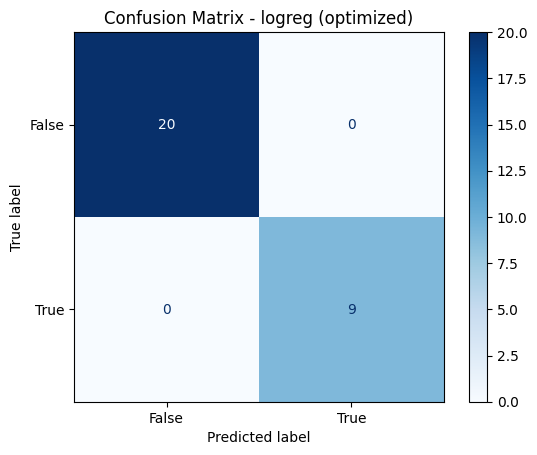

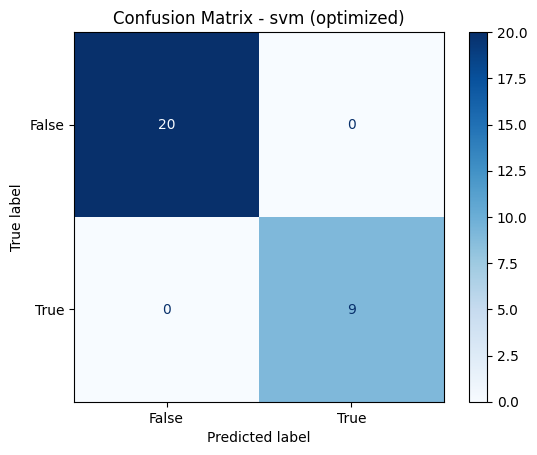

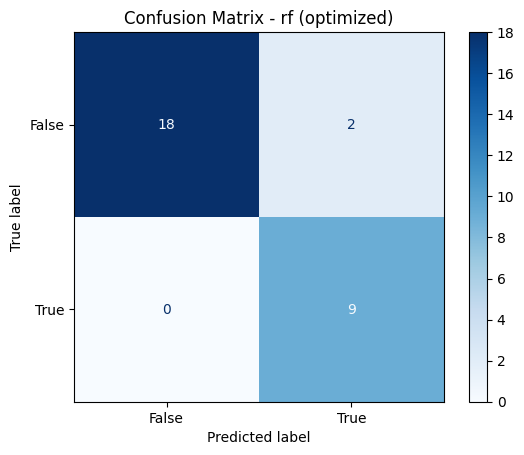

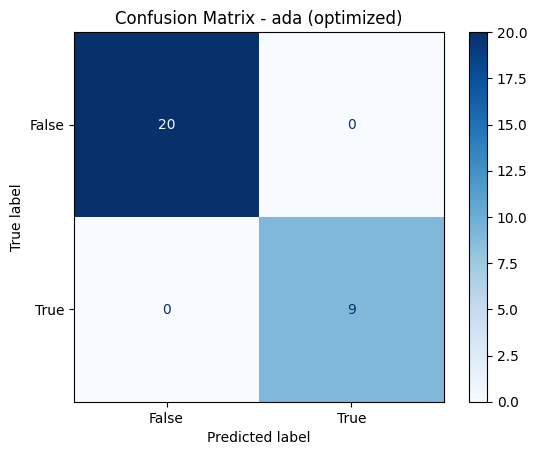

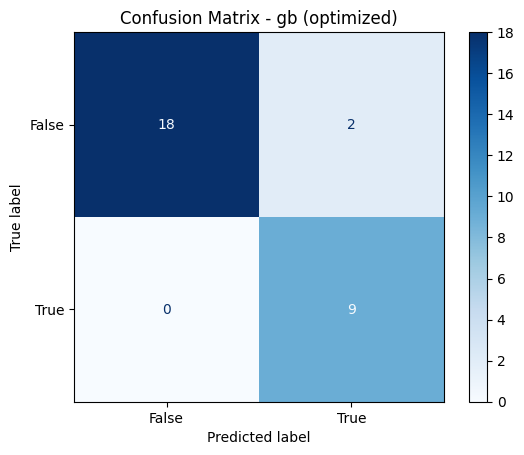

In [348]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, searchcv in bayes_dict.items():
    best_model = searchcv.best_estimator_

    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name} (optimized)')
    plt.show()


    

In [349]:
""" 
#pipe.named_steps['clf']
best_model = bayes_dict['logreg'].best_estimator_

#print(best_model)
clf = best_model.named_steps['clf']

coefficients = clf.coef_[0]
coefficients



import matplotlib.pyplot as plt

feature_names = X.columns  # sofern X ein DataFrame ist
importances = clf.coef_[0]

plt.barh(feature_names, importances)
plt.xlabel("Koeffizienten (Log Odds)")
plt.title("Feature Importance (Logistic Regression)")
plt.show()
"""


' \n#pipe.named_steps[\'clf\']\nbest_model = bayes_dict[\'logreg\'].best_estimator_\n\n#print(best_model)\nclf = best_model.named_steps[\'clf\']\n\ncoefficients = clf.coef_[0]\ncoefficients\n\n\n\nimport matplotlib.pyplot as plt\n\nfeature_names = X.columns  # sofern X ein DataFrame ist\nimportances = clf.coef_[0]\n\nplt.barh(feature_names, importances)\nplt.xlabel("Koeffizienten (Log Odds)")\nplt.title("Feature Importance (Logistic Regression)")\nplt.show()\n'

In [ ]:
# print df_results
print(df_results)

# get rf from grid_dict 
rf_grid = grid_dict['rf'].best_estimator_


        Bayes   Grid
logreg  0.980  0.976
svm     0.973  0.957
ada     0.957  0.976
gb      0.957  0.941
rf      0.937  0.961


<bound method Pipeline.get_params of Pipeline(steps=[('outlier', ZScoreOutlierImputer()),
                ('smote', SMOTE(random_state=123)), ('scale', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, random_state=42))])>

In [362]:
# get the logreg from the pipeline
best_model = bayes_dict['logreg'].best_estimator_
best_model



Pipeline(steps=[('outlier', ZScoreOutlierImputer()),
                ('smote', SMOTE(random_state=123)), ('scale', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('clf',
                 LogisticRegression(C=0.650241359121486, max_iter=242,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [361]:
# Submission
#best_model = rf_grid
df_test = pd.read_csv('data/breast-cancer-diagnostic.shuf.tes.csv')
ids = df_test['ID']
X_sub = df_test.drop(columns=['ID'])
y_pred = best_model.predict(X_sub)
y_pred = y_pred.astype(int) 

submission = pd.DataFrame({'ID': ids, 'diagnosis': y_pred})

submission.to_csv('submission.csv', index=False)
print("submission.csv new created.")


submission.csv new created.


submission.csv erstellt.
